# 텍스트마이닝

- 텍스트로부터 고품질의 정보를 도출하는 분석방법으로 입력된 텍스트를 구조화해 그 데이터에서 패턴을 도출한 후 결과를 평가 및 해석하는 일련의 과정
- 다양한 형태의 문서(웹 콘텐츠, PDF, MS office file, XML, text file 등)로부터 텍스트를 획득한 후 문서별 단어의 행렬을 만들어 추가적 분석을 수행하거나 데이터마이닝 기법을 적용하여 통찰을 발견하고 의사결정을 지원하는 방법
- 다양한 포맷의 문서로부터 텍스트를 추출하여 이를 하나의 레코드로 만들고 단어 구성에 따라 데이터 마트를 구성한다. 단어들 간의 관계를 이용하여 감성분석, 워드 클라우드분석 등을 수행한 후 이 정보를 클러스터링, 분류, 사회 연결망 분석 등에 활용한다.
- 주로 구조화된 정형 데이터 속에서 정보나 패턴을 발견하는 데이터마이닝과는 달리 텍스트마이닝은 인터넷 데이터, SNS 등과 같은 자연어로 구성된 비정형 텍스트 데이터 속에서 정보나 관계를 발견하는 분석 기법이다.

### 텍스트 마이닝 기능
- 문서 요약
- 문서 분류
- 문서 군집
- 특성 추출


## 텍스트 분석 수행 프로세스
- 1. 텍스트 사전 준비작업(텍스트 전처리) : 텍스트를 피처로 만들기 전에 사전에 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미 없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업
- 2. 피터 벡터화 / 추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당한다. 대표적인 방법은 BOW와 Word2Vec이 있으며BOW는 Count기반과 TF-IDF 방법이 있다.
- 3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화 된 데이터에 ML 모델을 적용하여 학습/예측 및 평가를 수행한다.

### 텍스트 정규화
- 텍스트를 ML 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것을 의미한다.

< 종류 >
- 클렌징
- 토큰화
- 필터링/stopword 제거 및 철자 수정
- stemming
- lemmatization

#### 문장토큰화 
- 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 빌반적이다.

In [124]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /Users/kisehyun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kisehyun/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [105]:
text = 'The Matrix is everywhere its all around us, here even in this room. \
You can see it our your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'

In [106]:
sentence = sent_tokenize(text)

In [108]:
print(f'토큰화 후 객체 타입은 {type(sentence)}이고 길이는 {len(sentence)}')
print(sentence)

토큰화 후 객체 타입은 <class 'list'>이고 길이는 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it our your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#### 단어 토큰화
- 문장을 단어로 토큰화하는 것으로 기본적으로 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리하지만 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행 할 수 있다.
- 일반적으로 문장 토큰화는 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용 될 때 사용한다.

In [109]:
from nltk import word_tokenize

In [110]:
word = word_tokenize(text)

In [111]:
print(f'토큰화 후 객체 타입은 {type(word)}이고 길이는 {len(word)}')
print(word)

토큰화 후 객체 타입은 <class 'list'>이고 길이는 45
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.', 'You', 'can', 'see', 'it', 'our', 'your', 'window', 'or', 'on', 'your', 'television', '.', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']


문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미가 무시되기 때문에 n-gram 활용

#### Stopword
- 분석에 큰 의미가 없는 단어를 지칭

In [97]:
from nltk.corpus import stopwords 

In [112]:
st = stopwords.words('english')
st[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

### Stemming & Lemmatization

- Lemmatization이 Stemming 보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다.
- Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 저굥ㅇ해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있다.
- 이에 반해 Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아준다.
- 따라서 Lemma가 Stemm 보다 변환에 더 오랜 시간이 필요하다.

In [121]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [115]:
stemmer = LancasterStemmer()

In [120]:
print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('happier'), stemmer.stem('happiest'), stemmer.stem('happy'))
print(stemmer.stem('amusing'), stemmer.stem('amused'), stemmer.stem('amuse'))

work work work
happy happiest happy
amus amus amus


amuse가 원형인데 amus만 인식한다. 

In [125]:
lemma = WordNetLemmatizer()

In [126]:
print(lemma.lemmatize('working', 'v'), lemma.lemmatize('works', 'v'), lemma.lemmatize('worked', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'), lemma.lemmatize('happy', 'a'))
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amused', 'v'), lemma.lemmatize('amuse', 'v'))

work work work
happy happy happy
amuse amuse amuse


stemmer 보다 원형 단어 추출을 더 잘하는 것을 알 수 있다.
***
## BOW
- 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처를 추출하는 모델
- 쉽고 빠른 구축이라는 장점을 가지고 있다.
- 하지만 문맥 의미 반영 부족과 희소 행렬 문제 등의 단점이 있다.

#### 영어 형태소 분석기

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from konlpy.tag import Mecab
import pandas as pd
from PIL import Image
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
import nltk

### Corpus 만들기

### 형용사 추출

In [6]:
adj = []

In [7]:
mecab = Mecab()

In [8]:
mecab.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [4]:
news = pd.read_table('/Users/kisehyun/study_code/ADP/PART 06 실습용 데이터/키워드_뉴스.txt', sep = '\t', encoding = 'cp949', names = ['텍스트'])

In [5]:
news.head()

,텍스트
0,동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산...
1,첨단 정보통신기술에 AI 등이 더해지면서 무기체계가 날로 지능화하는 가운데 '국방개...
2,SK하이닉스는 김영한(사진) 미국 샌디에이고 캘리포니아대(UCSD) 종신 교수를 수...
3,삼성SDS(대표 홍원표)는 국내·외 대학(원)생을 대상으로 데이터 분석 경진대회인 ...
4,푸드테크 스타트업들이 빅데이터 기반 시스템 배달 체계로 전환한다. 일선 상점과 배달...


In [9]:
for r in news.values :
    token = mecab.pos(r[0])
    for text in token :
        if text[1].startswith('VA') :
            adj.append(text[0])
        else :
            pass

In [10]:
adj[:10] #형용사 10개

['높', '빨라', '새로운', '빠르', '빨라', '걸맞', '뛰어난', '좋', '있', '같']

### TDM 만들기

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### TF-IDF
- 개별 문서에서 자주 등장하는 단어에 높은 가중치를 주되 모든 문서에서 전반적으로 자주 등장하는 단어에 대해서는 페널티를 주는 방식으로 값을 부여한다.
- TF : 1개 문서 안에서 특정 단어의 등장 빈도
- DF : 특정 단어가 나타나는 문서의 수
- IDF : DF를 일종의 역수 변환을 해준 값

$W_{i,j} = tf_{i,j} * \log_{}({N\over df_i})$

$tf_{i,j}$ = number of occurences of $i$ in $j$

$df_{i}$ = number of documents containg $i$

$N$ = total number of documents

In [12]:
news.values[0]

array(["동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산업혁명 혁신선도대학으로 최종선정됐습니다. 동아대가 혁신선도대학으로 펼치게 될 ‘수요자 데이터기반 스마트헬스케어 서비스’ 산업은 리빙데이터(운동·영양·약물)와 메디컬데이터(생체계측·진료기록)를 종합 분석, 다양한 헬스케어 서비스를 제공하는 것입니다. 동아대는 건강과학대학과 의료원, 재활요양병원 등 경쟁력 있는 인프라를 바탕으로 신뢰도 높은 정밀 분석을 실시, ‘헬스케어 기획 전문가’와 ‘헬스케어 데이터분석 전문가’ 등 수요자 맞춤형 헬스케어 서비스 분야를 선도하는 전문 인재를 키워나갈 계획입니다. ‘스마트헬스케어 융합전공’을 신설, 경영정보학과를 중심으로 한 빅데이터 분석, 식품영양학과·의약생명공학과·건강관리학과 중심의 헬스케어 등 학문 간 경계는 교육혁신도 이뤄나갈 방침입니다. "],
      dtype=object)

위의 보다시피 array 형태로 나오기 때문에 인덱싱 0필요

In [138]:
text = [x[0] for x in news.values] # 0으로 인덱싱

In [14]:
text[0]

"동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산업혁명 혁신선도대학으로 최종선정됐습니다. 동아대가 혁신선도대학으로 펼치게 될 ‘수요자 데이터기반 스마트헬스케어 서비스’ 산업은 리빙데이터(운동·영양·약물)와 메디컬데이터(생체계측·진료기록)를 종합 분석, 다양한 헬스케어 서비스를 제공하는 것입니다. 동아대는 건강과학대학과 의료원, 재활요양병원 등 경쟁력 있는 인프라를 바탕으로 신뢰도 높은 정밀 분석을 실시, ‘헬스케어 기획 전문가’와 ‘헬스케어 데이터분석 전문가’ 등 수요자 맞춤형 헬스케어 서비스 분야를 선도하는 전문 인재를 키워나갈 계획입니다. ‘스마트헬스케어 융합전공’을 신설, 경영정보학과를 중심으로 한 빅데이터 분석, 식품영양학과·의약생명공학과·건강관리학과 중심의 헬스케어 등 학문 간 경계는 교육혁신도 이뤄나갈 방침입니다. "

In [157]:
tf = TfidfVectorizer(min_df = 3, max_features = 500, lowercase = False)

In [158]:
tfidf = tf.fit_transform([x[0] for x in news.values])

In [160]:
tf.get_feature_names()[:10]

['4차', 'AI', '개발', '경쟁력', '경쟁력을', '계획이다', '관계자는', '관련', '기반', '기반으로']

### CountVectorizer
- 전처리 없이 공백 기준으로 TDM 구축

In [15]:
c = CountVectorizer()

In [16]:
tdm = c.fit_transform([x[0] for x in news.values])

In [17]:
tdm

<10x1388 sparse matrix of type '<class 'numpy.int64'>'
	with 1635 stored elements in Compressed Sparse Row format>

In [18]:
c.get_feature_names()[:20]

['000만원',
 '000만원으로',
 '000명',
 '10시간',
 '10월',
 '10일',
 '10일부터',
 '11월',
 '13일',
 '150여명에',
 '15여년간',
 '15일',
 '15일까지',
 '17일',
 '1월부터',
 '1일부터',
 '1차',
 '1팀',
 '200만원',
 '2014년']

In [19]:
tdm = pd.DataFrame(tdm.todense().T, index = c.get_feature_names())

In [20]:
tdm.head(10)

,0,1,2,3,4,5,6,7,8,9
000만원,0,0,0,0,0,0,1,0,0,0
000만원으로,0,0,0,0,0,0,1,0,0,0
000명,0,0,0,1,0,0,0,0,0,0
10시간,0,0,0,0,1,0,0,0,0,0
10월,0,0,0,0,0,0,1,0,0,0
10일,0,0,1,0,0,0,0,0,0,0
10일부터,0,0,1,0,0,0,0,0,0,0
11월,0,0,0,1,0,0,0,0,0,0
13일,0,0,0,0,1,0,0,0,0,0
150여명에,0,0,0,0,0,0,0,0,0,1


#### 0 ~ 9번(10개 기사) 본문에서 등장한 각 단어들을 원-핫 인코딩으로 표현한 데이터 프레임

In [21]:
news.텍스트.str.contains('힘써달라')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: 텍스트, dtype: bool

#### 실제로 9번째 글에 '힘써달라'라는 단어가 있는 것을 알 수 있다.

### 명사만 추출하여 TDM 구축

In [22]:
nouns_token = []

In [23]:
for r in news.values :
    nouns = mecab.nouns(r[0])
    nouns_token.append(nouns)

In [24]:
token_df = pd.DataFrame([t + ' ' for x in nouns_token for t in x])

In [25]:
token_df.head()

,0
0,동아
1,대학교
2,총장
3,한석정
4,수요자


In [26]:
from collections import Counter

In [27]:
l = []
for i in range(10) :
    l += nouns_token[i]

In [28]:
word_df = pd.DataFrame(l, columns = ['단어'])
word_df.head()

,단어
0,동아
1,대학교
2,총장
3,한석정
4,수요자


In [29]:
for doc_num in range(10) :
    cnt = Counter(nouns_token[doc_num])
    key = list(cnt.keys())
    value = list(cnt.values())
    doc_df = pd.DataFrame({'단어' : key, f'기사{doc_num + 1}' : value})
    word_df = pd.merge(word_df, doc_df, how = 'left', on = '단어')
word_df.fillna(0, inplace = True)

In [30]:
word_df # 명사 TDM 구축

,단어,기사1,기사2,기사3,기사4,기사5,기사6,기사7,기사8,기사9,기사10
0,동아,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,대학교,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,총장,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,한석정,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,수요자,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2016,모델,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2017,등,3.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0
2018,개발,0.0,0.0,3.0,0.0,4.0,0.0,1.0,0.0,1.0,3.0
2019,서비스,4.0,3.0,0.0,0.0,7.0,4.0,1.0,0.0,0.0,3.0


#### 상위 20개 단어 시각화

In [31]:
top20 = pd.Series(l).value_counts().sort_values(ascending = False)[:20].reset_index(name = '언급량')

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


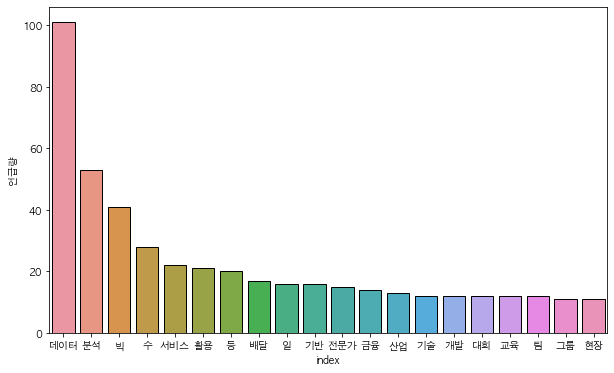

In [32]:
plt.figure(figsize = (10,6))
sns.barplot(top20['index'], top20.언급량, edgecolor = (0, 0, 0))
plt.show()

## 워드클라우드

In [33]:
from wordcloud import WordCloud

In [34]:
dict(Counter(l).most_common(100))

{'데이터': 101,
 '분석': 53,
 '빅': 41,
 '수': 28,
 '서비스': 22,
 '활용': 21,
 '등': 20,
 '배달': 17,
 '기반': 16,
 '일': 16,
 '전문가': 15,
 '금융': 14,
 '산업': 13,
 '교육': 12,
 '기술': 12,
 '개발': 12,
 '대회': 12,
 '팀': 12,
 '대표': 11,
 '현장': 11,
 '그룹': 11,
 '시간': 10,
 '차': 9,
 '것': 9,
 '원': 9,
 '정보': 9,
 '국방': 9,
 '경진': 9,
 '브라이': 9,
 '월': 9,
 '계획': 8,
 '년': 8,
 '연구': 8,
 '제조': 8,
 '시스템': 8,
 '과제': 8,
 '환경': 8,
 '스마트': 7,
 '헬스': 7,
 '케어': 7,
 '분야': 7,
 '혁신': 7,
 '경쟁력': 7,
 '체계': 7,
 '방안': 7,
 '업계': 7,
 '올해': 7,
 '역량': 7,
 '대상': 7,
 '개최': 7,
 '지원': 7,
 '부문': 7,
 '만': 7,
 '기사': 7,
 '참여': 7,
 '대구': 7,
 '혁명': 6,
 '제공': 6,
 '과학': 6,
 '운영': 6,
 '말': 6,
 '엔지니어': 6,
 '관계자': 6,
 '러닝': 6,
 '우수': 6,
 '향상': 6,
 '주문': 6,
 '인력': 6,
 '광양제철': 6,
 '간': 5,
 '미래': 5,
 '인공지능': 5,
 '공정': 5,
 '하이닉스': 5,
 '기업': 5,
 '머신': 5,
 '예정': 5,
 '삼성': 5,
 '플랫': 5,
 '폼': 5,
 '명': 5,
 '사업': 5,
 '개': 5,
 '고객': 5,
 '배송': 5,
 '효율': 5,
 '코오롱': 5,
 '학습': 5,
 '대학': 4,
 '맞춤': 4,
 '전문': 4,
 '공학': 4,
 '속도': 4,
 '구축': 4,
 '블록체인': 4,
 '주제': 4,
 '클라우드': 4,
 '

- dict 형태는 generate_from_frequencies 메서드 활용

In [35]:
wc = WordCloud(font_path = 'AppleGothic', background_color = 'white').generate_from_frequencies(dict(Counter(l).most_common(100)))

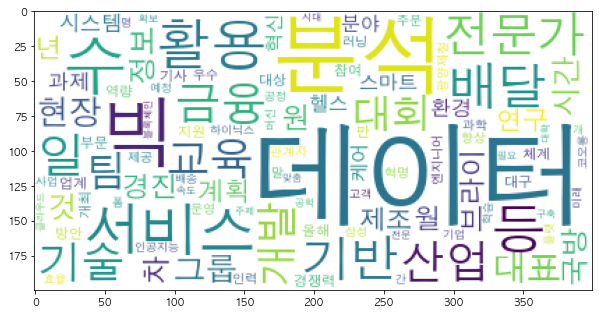

In [36]:
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.show()

***
### 주제분석

In [207]:
df = pd.read_csv('/Users/kisehyun/vacation/2019winter/비정형/wiki_movie_plots_deduped.csv')

In [208]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [209]:
plot = df['Plot']

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
plot_train, plot_test = train_test_split(plot, test_size=.2, random_state=1234)

In [212]:
tfidf = TfidfVectorizer(max_features = 2000, stop_words = 'english')

In [213]:
x_train = tfidf.fit_transform(plot_train)
x_test = tfidf.transform(plot_test)

In [214]:
from gensim.matutils import Sparse2Corpus

In [215]:
corpus = Sparse2Corpus(x_train.T)

In [217]:
id2word = dict(enumerate(tfidf.get_feature_names()))

In [221]:
id2word[10]

'accept'

In [222]:
from gensim.models.ldamodel import LdaModel

In [225]:
models = {}
for num_topics in [5, 10, 50]:
    models[num_topics] = LdaModel(
        corpus = corpus,
        num_topics = num_topics,
        passes = 5, # 클수록 더 분석 잘됨 / 전체데이터 몇번 훑어보냐
        iterations = 500, # 클수록 더 분석 잘됨
        id2word = id2word,
        random_state = 123)

In [226]:
test_corpus = Sparse2Corpus(x_test.T)

In [227]:
models[5].log_perplexity(test_corpus)

-8.080769902303723

#### Perplexity

0에 가까울 수록 더 좋다.
단어의 분포가 얼마나 정확한지

In [228]:
for num_topics in models:
    print(num_topics, models[num_topics].log_perplexity(test_corpus))

5 -8.080758346311226
10 -8.478776723703584
50 -10.316311212846818


In [236]:
models[5].show_topics()

[(0,
  '0.005*"war" + 0.004*"ship" + 0.004*"king" + 0.004*"army" + 0.003*"men" + 0.003*"group" + 0.003*"island" + 0.003*"world" + 0.003*"captain" + 0.003*"japanese"'),
 (1,
  '0.113*"tom" + 0.072*"jerry" + 0.061*"nick" + 0.039*"adam" + 0.033*"jake" + 0.032*"maggie" + 0.031*"bugs" + 0.029*"simon" + 0.029*"vicky" + 0.025*"leo"'),
 (2,
  '0.021*"police" + 0.012*"gang" + 0.011*"murder" + 0.008*"crime" + 0.008*"officer" + 0.008*"inspector" + 0.007*"case" + 0.007*"killer" + 0.007*"criminal" + 0.006*"maya"'),
 (3,
  '0.004*"new" + 0.003*"home" + 0.003*"father" + 0.003*"man" + 0.003*"john" + 0.003*"tells" + 0.003*"wife" + 0.003*"house" + 0.003*"mother" + 0.003*"money"'),
 (4,
  '0.010*"love" + 0.008*"father" + 0.007*"family" + 0.007*"story" + 0.007*"village" + 0.006*"son" + 0.006*"life" + 0.006*"mother" + 0.005*"daughter" + 0.005*"film"')]

In [230]:
row = x_test[3]
doc = list(zip(row.indices, row.data))
doc[:10] # (몇번째 단어, 몇번 등장)

[(1993, 0.06528280681046097),
 (1977, 0.07151206703394507),
 (1972, 0.05584072279450985),
 (1971, 0.08521185343204893),
 (1905, 0.08271537554653867),
 (1880, 0.07078730465734658),
 (1853, 0.037420602783727726),
 (1808, 0.13836375779228274),
 (1790, 0.057526286760798066),
 (1778, 0.05102612333044115)]

In [231]:
models[5].get_document_topics(doc) # 이 문서가 몇번 토픽을 가지고 있는지 나타냄

[(0, 0.023540417),
 (1, 0.031190291),
 (2, 0.6707645),
 (3, 0.023531703),
 (4, 0.25097308)]

In [238]:
plot_test.iloc[3][:200] # 주로 kill, police 등 이야기

'Sakthi (Vijay) is the adopted son of a Madurai-based don Sivan (Mohanlal) and is also his right-hand man, bodyguard and driver. He hates the police due to a police officer killing his father, who was '

### LSA

In [256]:
from sklearn.decomposition import TruncatedSVD

In [271]:
svd = TruncatedSVD(n_components = 10, random_state=1234) # 10개 주제 출력

In [272]:
tr_svd = svd.fit(x_train)

In [273]:
doc_emb = svd.transform(x_test)

In [274]:
doc_emb.shape

(6978, 10)

In [275]:
loading = pd.DataFrame(svd.components_.T)

In [276]:
loading['word'] = tfidf.get_feature_names()

In [277]:
loading.sort_values(0, ascending=False).loc[:, [0, 'word']]

,0,word
636,0.149419,father
1087,0.132846,love
630,0.128779,family
1110,0.113285,man
1188,0.109760,mother
...,...,...
1720,0.004829,steven
948,0.004761,josh
1010,0.004638,kyle
1128,0.004345,marty


In [278]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(tr_svd.components_, loading['word'])

Topic 1: [('father', 0.14942), ('love', 0.13285), ('family', 0.12878), ('man', 0.11329), ('mother', 0.10976)]
Topic 2: [('love', 0.26227), ('father', 0.19947), ('village', 0.19565), ('family', 0.19342), ('marriage', 0.1504)]
Topic 3: [('tom', 0.64096), ('jerry', 0.36855), ('mother', 0.07864), ('house', 0.07737), ('joe', 0.07518)]
Topic 4: [('film', 0.54669), ('tom', 0.25103), ('story', 0.20438), ('jerry', 0.13898), ('life', 0.12745)]
Topic 5: [('tom', 0.4907), ('jerry', 0.27631), ('village', 0.2592), ('king', 0.17162), ('raja', 0.11661)]
Topic 6: [('film', 0.38355), ('police', 0.36652), ('story', 0.18817), ('gang', 0.17977), ('murder', 0.14428)]
Topic 7: [('jack', 0.86631), ('film', 0.10321), ('wife', 0.09758), ('mary', 0.08244), ('sam', 0.07997)]
Topic 8: [('joe', 0.4769), ('love', 0.38502), ('falls', 0.14386), ('raja', 0.12313), ('jack', 0.11856)]
Topic 9: [('joe', 0.58395), ('village', 0.4289), ('family', 0.27784), ('villagers', 0.12338), ('father', 0.11654)]
Topic 10: [('school', 0

### NMF 활용

In [279]:
from sklearn.decomposition import NMF

In [280]:
nmf = NMF(n_components = 20, random_state=1234)
nmf.fit(x_train)

NMF(n_components=20, random_state=1234)

In [281]:
loading = pd.DataFrame(nmf.components_.T)

In [282]:
loading['word'] = tfidf.get_feature_names()

In [283]:
loading.sort_values(0, ascending=False).loc[:, [0, 'word']].head(10)

,0,word
1797,0.960970,tells
850,0.893712,house
838,0.852376,home
1225,0.796090,new
1230,0.776854,night
1180,0.699460,money
263,0.693152,car
445,0.672845,day
743,0.644448,goes
1823,0.607291,time


In [284]:
emb = nmf.transform(x_test)

In [290]:
sorted(list(enumerate(emb[150])), key=lambda x: x[1], reverse=True)
# 0번차원이 가장 큼(0번 차원에 많은 단어 위치) / 좌표가 0은 해당 차원으로 단어가 없다

[(0, 0.014872720424531754),
 (1, 0.014779370655314214),
 (8, 0.014452449778256257),
 (17, 0.01212802989601967),
 (9, 0.006738482993220086),
 (6, 0.004763297144121587),
 (19, 0.003527971358305374),
 (5, 0.0022847492473488063),
 (12, 0.0022113811414935275),
 (11, 0.0019661582044016098),
 (14, 0.0012251313093876275),
 (2, 0.0010372289295779475),
 (3, 0.0),
 (4, 0.0),
 (7, 0.0),
 (10, 0.0),
 (13, 0.0),
 (15, 0.0),
 (16, 0.0),
 (18, 0.0)]

### 감성분석
#### 지도학습 기반

In [293]:
data = pd.read_csv('/Users/kisehyun/Vacation/2019summer/python_machinelearning_guide/word2vec-nlp-tutorial/labeledTrainData.tsv', header = 0, sep = '\t', quoting =3)

In [295]:
data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [296]:
data['review'] = data.review.str.replace('<br />', ' ')

In [297]:
data['review'] = data.review.apply(lambda x : re.sub(r'[^a-zA-Z]', ' ', x))

In [299]:
X_train, X_test, y_train, y_test = train_test_split(data.review, data.sentiment, test_size = .2, random_state = 530)

In [300]:
tfidf = TfidfVectorizer(max_features = 1000, ngram_range = (1,3), stop_words = 'english')

In [301]:
X_train = tfidf.fit_transform(X_train)

In [302]:
X_test = tfidf.transform(X_test)

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [304]:
rf = RandomForestClassifier(random_state = 530)

In [305]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=530)

In [306]:
pred = rf.predict_proba(X_test)[:, 1]

In [307]:
from sklearn.metrics import roc_auc_score

In [308]:
print(f'roc-auc는 {roc_auc_score(y_test, pred)}')

roc-auc는 0.913046052866379


#### 비지도학습 기반
- lexicon을 기반으로 한다. 

- sentiwordnet : 감성 단어 전용의 wordnet, 긍정 감성, 부정감성, 객관성 지수가 있다. 
- vader : SNS에 대한 감성분석, 비교적 빠른 수행 시간을 보장한다.
- pattern : 예측 성능에서 가장 주목 받는 패키지이다. 파이썬 3.x 버전에는 동작 x

In [309]:
from nltk.corpus import wordnet as wn

In [322]:
term = 'present'

In [323]:
synsets = wn.synsets(term)

In [324]:
for s in synsets :
    print(f'### Synset Name : {s.name()} ###')
    print(f'POS : {s.lexname()}')
    print(f'Definition : {s.definition()}')
    print(f'Lemmas : {s.lemma_names()}')

### Synset Name : present.n.01 ###
POS : noun.time
Definition : the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas : ['present', 'nowadays']
### Synset Name : present.n.02 ###
POS : noun.possession
Definition : something presented as a gift
Lemmas : ['present']
### Synset Name : present.n.03 ###
POS : noun.communication
Definition : a verb tense that expresses actions or states at the time of speaking
Lemmas : ['present', 'present_tense']
### Synset Name : show.v.01 ###
POS : verb.perception
Definition : give an exhibition of to an interested audience
Lemmas : ['show', 'demo', 'exhibit', 'present', 'demonstrate']
### Synset Name : present.v.02 ###
POS : verb.communication
Definition : bring forward and present to the mind
Lemmas : ['present', 'represent', 'lay_out']
### Synset Name : stage.v.01 ###
POS : verb.creation
Definition : perform (a play), especially on a stage
Lemmas : ['stage', 'present', 'represent']
### Synset Nam

wordnet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있다.

In [325]:
tree = wn.synset('tree.n.01')
cat = wn.synset('cat.n.01')
lion = wn.synset('lion.n.01')
dog = wn.synset('dog.n.01')
flower = wn.synset('flower.n.01')
car = wn.synset('car.n.01')

In [326]:
e = [tree, cat, lion, dog, flower, car]

In [327]:
s = []
e_names = [en.name().split('.')[0] for en in e]

In [328]:
for i in e :
    sim = [round(i.path_similarity(c), 2) for c in e]
    s.append(sim)

In [329]:
s_df = pd.DataFrame(s, columns = e, index = e_names)

In [330]:
s_df

,Synset('tree.n.01'),Synset('cat.n.01'),Synset('lion.n.01'),Synset('dog.n.01'),Synset('flower.n.01'),Synset('car.n.01')
tree,1.00,0.08,0.07,0.12,0.17,0.07
cat,0.08,1.00,0.25,0.20,0.07,0.06
lion,0.07,0.25,1.00,0.17,0.07,0.05
dog,0.12,0.20,0.17,1.00,0.11,0.08
flower,0.17,0.07,0.07,0.11,1.00,0.07
car,0.07,0.06,0.05,0.08,0.07,1.00


car와 lion이 유사도가 0.05로 가장 적고 cat과 lion이 유사도가 0.25로 가장 높다.

senti_synset은 wordnet의 synset과 유사하다. 

In [333]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as sw

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/kisehyun/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [334]:
s = list(sw.senti_synsets('slow'))

In [337]:
s

[SentiSynset('decelerate.v.01'),
 SentiSynset('slow.v.02'),
 SentiSynset('slow.v.03'),
 SentiSynset('slow.a.01'),
 SentiSynset('slow.a.02'),
 SentiSynset('dense.s.04'),
 SentiSynset('slow.a.04'),
 SentiSynset('boring.s.01'),
 SentiSynset('dull.s.08'),
 SentiSynset('slowly.r.01'),
 SentiSynset('behind.r.03')]

In [338]:
father = sw.senti_synset('father.n.01')

In [339]:
print(f'긍정감성 지수 : {father.pos_score()}')
print(f'부정감성 지수 : {father.neg_score()}')
print(f'객관성 지수 : {father.obj_score()}')

긍정감성 지수 : 0.0
부정감성 지수 : 0.0
객관성 지수 : 1.0


In [340]:
murder = sw.senti_synset('murder.v.01')

In [341]:
print(f'긍정감성 지수 : {murder.pos_score()}')
print(f'부정감성 지수 : {murder.neg_score()}')
print(f'객관성 지수 : {murder.obj_score()}')

긍정감성 지수 : 0.0
부정감성 지수 : 0.625
객관성 지수 : 0.375


각 단어의 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성지수가 0 이상일 경우 긍정 그렇지 않을 경우 부정 감성으로 예측

In [349]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kisehyun/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [352]:
def penn_to_wn(x) :
    if x.startswith('N') :
        return wn.NOUN
    elif x.startswith('A') :
        return wn.ADJ
    elif x.startswith('R') :
        return wn.ADV
    elif x.startswith('V') :
        return wn.VERB

In [356]:
def sw_polarity(x) :
    s = 0
    t_cnt = 0
    
    lemma = WordNetLemmatizer()
    r_s = sent_tokenize(x)
    
    for i in r_s :
        tagged_s = pos_tag(word_tokenize(i))
        for w, t in tagged_s :
            wn_tag = penn_to_wn(t)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV) :
                continue
            lem = lemma.lemmatize(w, pos = wn_tag)
            if not lem :
                continue
            synsets = wn.synsets(lem, pos = wn_tag)
            if not synsets :
                continue
                
            synset = synsets[0]
            sw_synset = sw.senti_synset(synset.name())
            s += (sw_synset.pos_score() - sw_synset.neg_score())
            t_cnt += 1
    if not t_cnt :
        return 0
    if s >= 0 :
        return 1
    return 0

In [357]:
data['pred'] = data.review.apply(sw_polarity)

In [363]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [362]:
print(confusion_matrix(data['sentiment'], data['pred']))

[[6781 5719]
 [5243 7257]]


In [371]:
print(f'정확도는 {accuracy_score(data.sentiment, data.pred) * 100}%')

정확도는 56.152%


#### vader 활용 감성 분석

In [374]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kisehyun/nltk_data...


In [375]:
analyzer = SentimentIntensityAnalyzer()

In [380]:
data.review[0]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for 

In [376]:
score = analyzer.polarity_scores(data['review'][0])
print(score)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [384]:
def vader_polrity(x,  threshold = .15) :
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(x)
    
    agg_score = score['compound']
    final = 1 if agg_score >= threshold else 0
    return final

In [385]:
data['vader_pred'] = data.review.apply(lambda x : vader_polrity(x, 0.15))

In [386]:
print(confusion_matrix(data['sentiment'], data['vader_pred']))

[[ 6829  5671]
 [ 1895 10605]]


In [387]:
print(f'정확도는 {accuracy_score(data.sentiment, data.vader_pred) * 100}%')

정확도는 69.736%


## 문서 유사도
### Doc2Vec
- window = n-gram
- size = 벡터 사이즈
- alpha = learning_rate
- dim = 학습방법 1 : PV-DM, 0 : PV_DBOW

In [392]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

In [393]:
s_w = set(stopwords.words('english'))

In [394]:
tokenizer = RegexpTokenizer("[\w']+")

In [395]:
token_plot = []

In [397]:
for text in tqdm(range(len(df.Plot))):
    token_plot.append(tokenizer.tokenize(df.Plot[text]))

100%|██████████| 34886/34886 [00:03<00:00, 9717.27it/s] 


In [398]:
t_s_w = []

In [399]:
for word in tqdm(range(len(token_plot))):
    t_s_w.append([text for text in token_plot[word] if not text in s_w])

100%|██████████| 34886/34886 [00:01<00:00, 28980.84it/s]


In [400]:
df['token_plot'] = t_s_w

In [401]:
doc_df = df[['Title','token_plot']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]

In [402]:
max_epochs = 10

model = Doc2Vec(
    window = 5,
    size = 500,
    alpha = 0.025, 
    min_alpha = 0.025,
    min_count = 3,
    dm = 1,
    negative = 5,
    seed = 530)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


<ipython-input-402-8d3f02b7c84c>:19: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  epochs=model.iter)


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [405]:
model.random.seed(530)

In [406]:
return_docs = model.docvecs.most_similar('Star Wars: The Last Jedi',topn = 10)
for s_m in return_docs:
    for context in df[df['Title'] == s_m[0]]['Plot']:
        print('유사 영화 제목은', s_m[0])
        #print('유사도는', s_m[1])
        #print('영화 내용은', context)
        print('#############------############------############'*2)

유사 영화 제목은 Return of the Jedi
#############------############------#########################------############------############
유사 영화 제목은 Star Wars Episode IV: A New Hope (aka Star Wars)
#############------############------#########################------############------############
유사 영화 제목은 The Empire Strikes Back
#############------############------#########################------############------############
유사 영화 제목은 Star Wars: Episode I – The Phantom Menace 3D
#############------############------#########################------############------############
유사 영화 제목은 Star Wars: Episode III – Revenge of the Sith
#############------############------#########################------############------############
유사 영화 제목은 Star Wars: Episode I – The Phantom Menace
#############------############------#########################------############------############
유사 영화 제목은 Star Wars: The Force Unleashed
#############------############------#########################------############-

### 코사인 유사도


In [407]:
from sklearn.metrics.pairwise import linear_kernel

In [410]:
tfidf = TfidfVectorizer(stop_words='english', max_features = 1500)

tfidf_matrix = tfidf.fit_transform(df['Plot'])
print(tfidf_matrix.shape)

(34886, 1500)


In [411]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [415]:
indices = pd.Series(df.index,index=df['Title']).drop_duplicates()

In [423]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df['Title'].iloc[movie_indices]

In [424]:
get_recommendations('Taken 3')

11434    Initiation: Silent Night, Deadly Night 4
16382                                     Taken 2
15543                                       Taken
16907                               The Interview
34741                                 The Priests
21111                                 Chalet Girl
17876                           Kath & Kimderella
5853                            Fair Wind to Java
23387                         The Three Swordsmen
34535                                     Unbowed
Name: Title, dtype: object

### 한글 텍스트 분류 - Tfidf + LGBM + multiclass

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
train.head()

,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [39]:
test.head()

,index,data
0,0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [40]:
train.category.value_counts()

2    13362
1    13337
0    13301
Name: category, dtype: int64

In [41]:
train[train.data.isnull()]

,index,category,data
2819,2819,0,NaN
3462,3462,1,NaN
20934,20934,2,NaN
22856,22856,2,NaN
26550,26550,2,NaN
28546,28546,2,NaN
31400,31400,1,NaN
36070,36070,0,NaN


In [42]:
train.dropna(inplace = True)

In [43]:
import re

In [44]:
train['data'] = [re.sub(r'[^가-힣]', ' ', x) for x in train['data']]
test['data'] = [re.sub(r'[^가-힣]', ' ', x) for x in test['data']]

In [45]:
tf = TfidfVectorizer(min_df = 5, max_features = 500)

In [46]:
from tqdm import tqdm

In [52]:
tr_tokens = []
for t in train['data'] :
    nouns = []
    temp_x = mecab.nouns(t)
    for t2 in temp_x :
        if len(t2) > 1 :
            nouns.append(t2)
        else :
            pass
    tr_tokens.append(nouns)

In [53]:
te_tokens = []
for t in test['data'] :
    nouns = []
    temp_x = mecab.nouns(t)
    for t2 in temp_x :
        if len(t2) > 1 :
            nouns.append(t2)
        else :
            pass
    te_tokens.append(nouns)

In [250]:
import numpy as np

In [54]:
train['token'] = tr_tokens
test['token'] = te_tokens

In [55]:
tf = TfidfVectorizer(max_features = 300, min_df = 7, lowercase = False)

In [56]:
train['len_token'] = [len(x) for x in train['token']]

In [57]:
train.sort_values(by = 'len_token')[:10]

,index,category,data,token,len_token
4003,4003,1,룰을 모르면 국대 그만둬야죠 룰을 모르면 그만둬야죠,[],0
35035,35035,1,빠른년생 빠른년생 술마시게 해주세요 너무 힘듭니다,[],0
24885,24885,1,,[],0
29972,29972,0,...,[],0
33229,33229,0,한표한표 모여 큰 힘이 되길 안되는거 알지만 그래도 한표 올립니다,[],0
11215,11215,1,,[],0
16884,16884,0,이따 네시에 깨워주세요 잘거임,[],0
28496,28496,1,,[],0
30773,30773,0,,[],0
14916,14916,1,,[],0


In [58]:
train = train[train.len_token > 0]

In [59]:
tr_sentence = []
for t in train.token :
    c = ''
    for n in range(len(t)) :
        text = t[n] + ' '
        c += text
    tr_sentence.append(c)

In [60]:
te_sentence = []
for t in test.token :
    c = ''
    for n in range(len(t)) :
        text = t[n] + ' '
        c += text
    te_sentence.append(c)

In [62]:
tr_sentence[:2]

['신혼 부부 주택 정책 보육 시설 국민 세금 일부 정책 보편 국민 수긍 복지 정책 신혼 부부 당첨 사람 로또 주택 정책 반대 국민 세금 일부 사람 세금 우리 보육 시설 전국 설치 기업 솔선수범 사업장 의무 설치 경력 단절 개인 능력 능력 육아 전담 우리 아이 부모 이제 국가 시대 부동산 가격 정부 정책 부동산 역효과 ',
 '학교 이름 남자 울산 여자 중학교 재학 학생 최근 양성 평등 글짓기 생각 우리 울산 울산 중학교 하나 남중 하나 여중 우리 학교 여자 남자 우위 학교 울산 중학교 남중 남자 울산 남자 중학교 평소 학교 이름 우리 학교 여중 남중 동안 현실 이젠 조선 시대 국내 학교 울산 국내 고등학교 문제 해결 ']

In [64]:
tfidf = tf.fit_transform(tr_sentence)

In [65]:
X = tfidf.todense()

In [66]:
X.shape

(39969, 300)

In [67]:
X = pd.DataFrame(X, columns = tf.get_feature_names())

In [68]:
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier

In [69]:
lgbm = LGBMClassifier(metric = 'multi_logloss', objective = 'multiclass', random_state = 530, n_estimators = 10000)

In [70]:
y = train.category

In [71]:
X.shape

(39969, 300)

In [84]:
target = tf.transform(te_sentence).todense()

In [85]:
target.shape

(5000, 300)

In [87]:
target = pd.DataFrame(target, columns = tf.get_feature_names())

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [73]:
skf = StratifiedKFold(n_splits = 15, random_state = 530, shuffle = True)

multiclass의 경우 lgbm은 multiclass 지정하면 됨

정확도 계산의 경우 sklearn의 MultioutputClassifier 사용

In [ ]:
i = 0
sub_pred = np.zeros((target.shape[0], 3))
for tr_idx, val_idx in skf.split(X, y) :
    i += 1
    print(f'#### {i} FOLD ####')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    lgbm.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)], verbose = 2000, early_stopping_rounds = 1000)
    pred = lgbm.predict_proba(target) / 15
    sub_pred += pred

#### 추가) 영어 전처리

In [172]:
### url 제거
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [173]:
### html 포맷 제거
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [175]:
### 이모티콘 제거
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

## 딥러닝

In [ ]:
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import *
#from tensorflow.keras.regularizers import *
#from tensorflow.keras.optimizers import *
#from tensorflow.keras.callbacks import *
#from sklearn.metrics import accuracy_score

In [ ]:
#tokenizer = Tokenizer(num_words = n) # 가장 빈도 높은 n개 단어 추출 / 초기 단계에선느 n세팅 no

In [ ]:
#tokenizer.fit_on_texts(text)

In [ ]:
#one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 dictionary 형태로 확인
#word_index = tokenizer.word_index

#print('Found %s unique tokens.' % len(word_index))

In [ ]:
#threshold = 6
#total_cnt = len(tokenizer.word_index) # 단어의 수
#rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
#total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
#rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
#for key, value in tokenizer.word_counts.items():
#    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
#    if(value < threshold):
#        rare_cnt = rare_cnt + 1
#        rare_freq = rare_freq + value

#print('단어 집합(vocabulary)의 크기 :',total_cnt)
#print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
#print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
#print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [403]:
#vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
#print('단어 집합의 크기 :',vocab_size)

In [404]:
#tokenizer = Tokenizer(vocab_size)
#tokenizer.fit_on_texts(text)

In [ ]:
#seq = tokenizer.texts_to_sequences(text)

In [ ]:
#seq = pad_sequences(sequences, maxlen = max_len)

In [ ]:
#model = Sequential()
#model.add(Embedding(vocab_size, 32, input_length = max_len))
#model.add(Dropout(.2))
#model.add(GRU(32, dropout = .2, recurrent_dropout = .1))
#model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#model = Sequential()
#model.add(Embedding(vocab_size, 32, input_length = max_len))
#model.add(Dropout(.3))
#model.add(Conv1D(32, 3, activation='relu', kernel_regularizer = l2(0.001)))
#model.add(GlobalMaxPooling1D())
#model.add(Dense(32, activation = 'relu'))
#model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 3)
#mc = ModelCheckpoint('model1.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
#model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
#history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])